In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns',200) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('ggplot') # a style that can be used for plots - see style reference above

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import os
#%pip install --upgrade psutil
%pip install dython
from dython import nominal


Note: you may need to restart the kernel to use updated packages.


In [5]:
os.getcwd()

'/Users/jamesevans/Documents/GitHub/Data-Dive-1'

In [25]:
df = pd.read_csv('survey lung cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [29]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [30]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


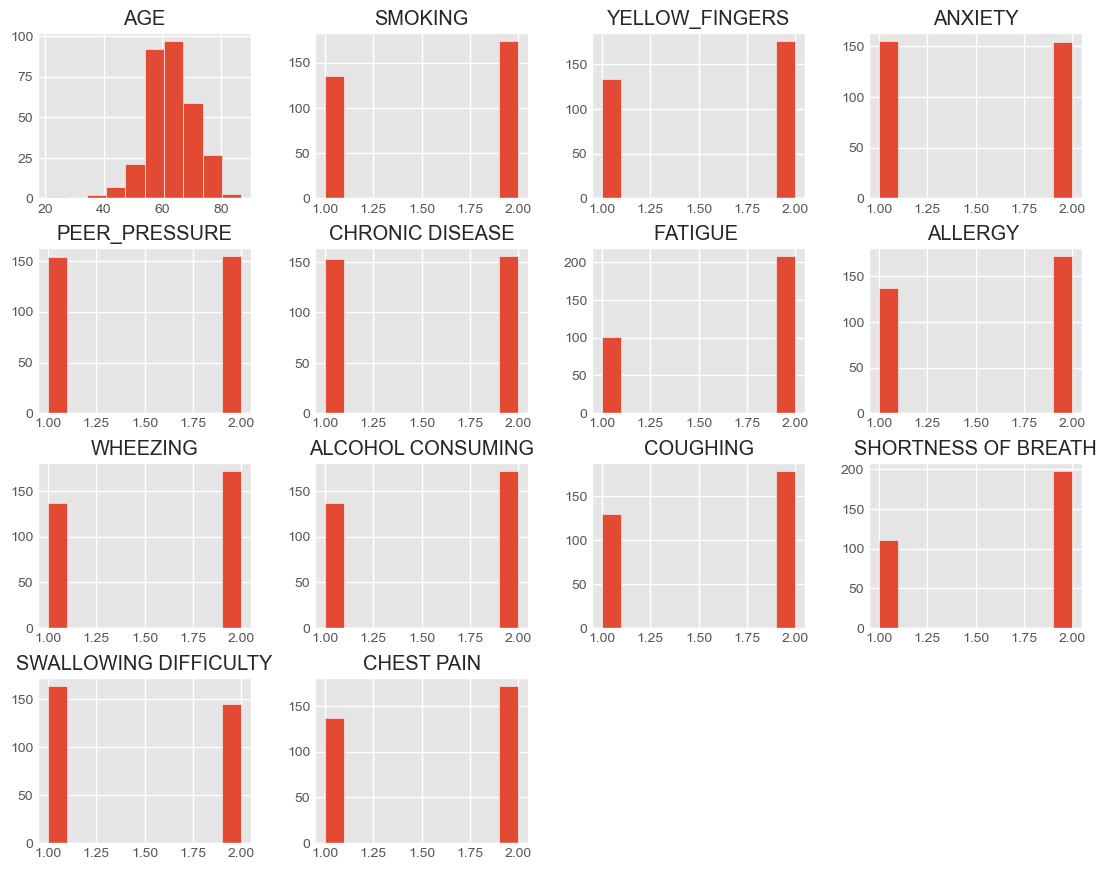

In [6]:
df.hist(figsize=(12,10))
plt.show()

/var/folders/8y/_5xbmnyx63n5_0zd2ycbxld00000gn/T/ipykernel_53450/2425586946.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


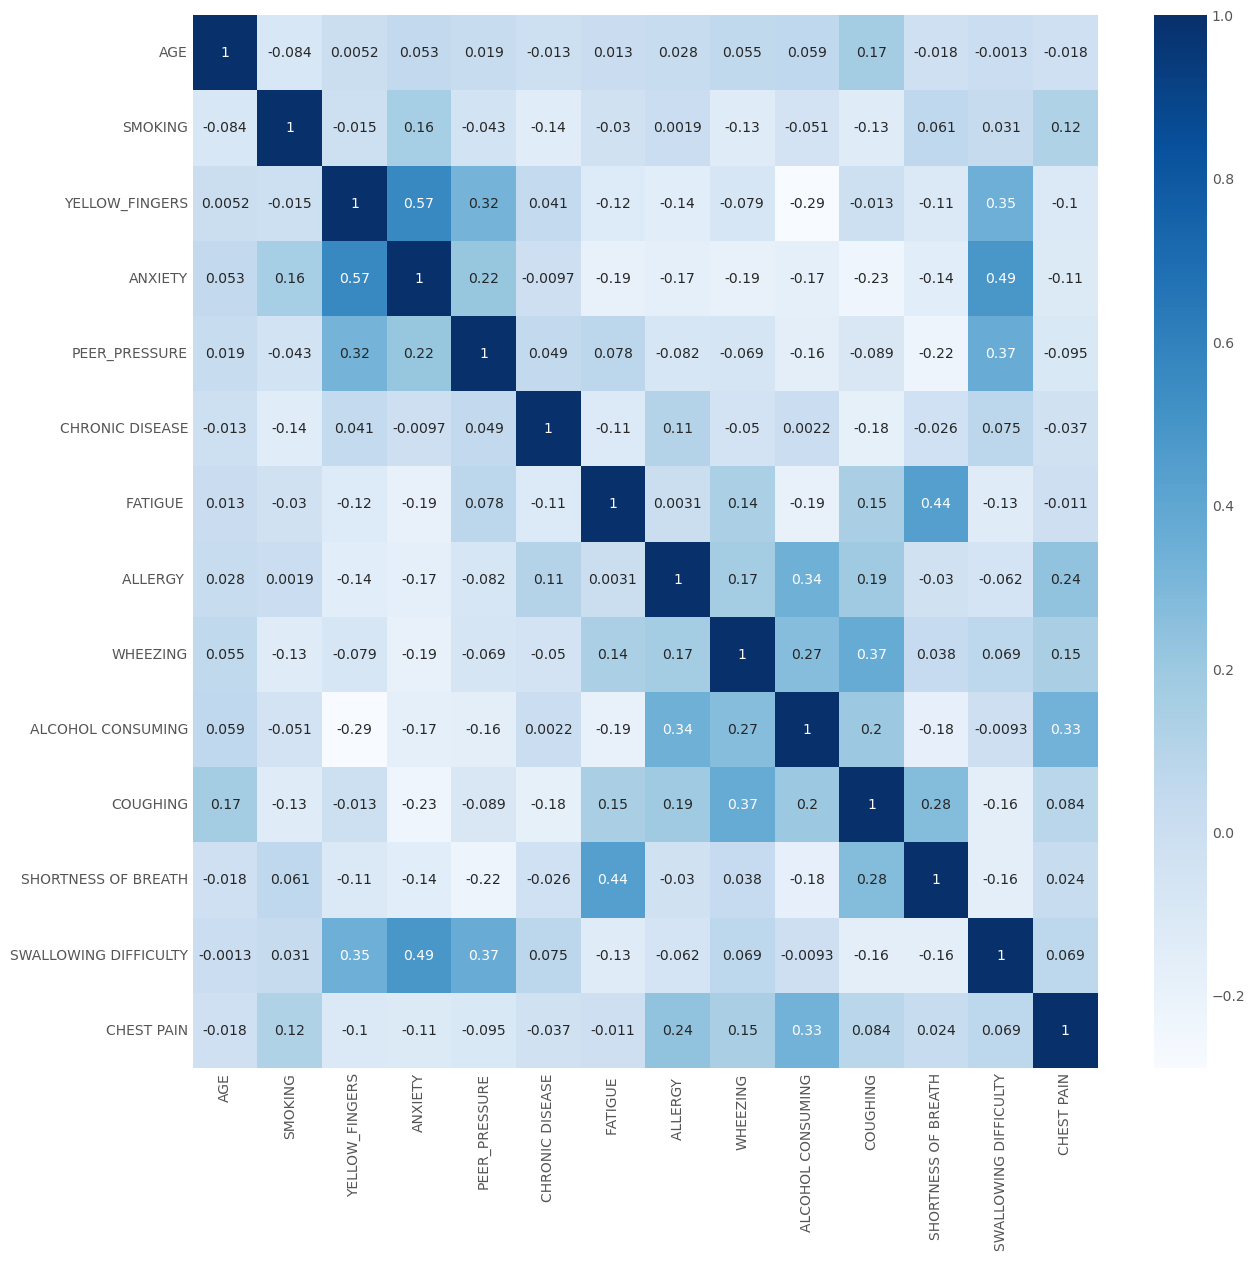

In [26]:
#creating a single correlation matrix for each indivdual variable
corr = df.corr()
features = corr.index
plt.figure(figsize=(13,13))
ax = sns.heatmap(df[features].corr(), annot=True, cmap='Blues')

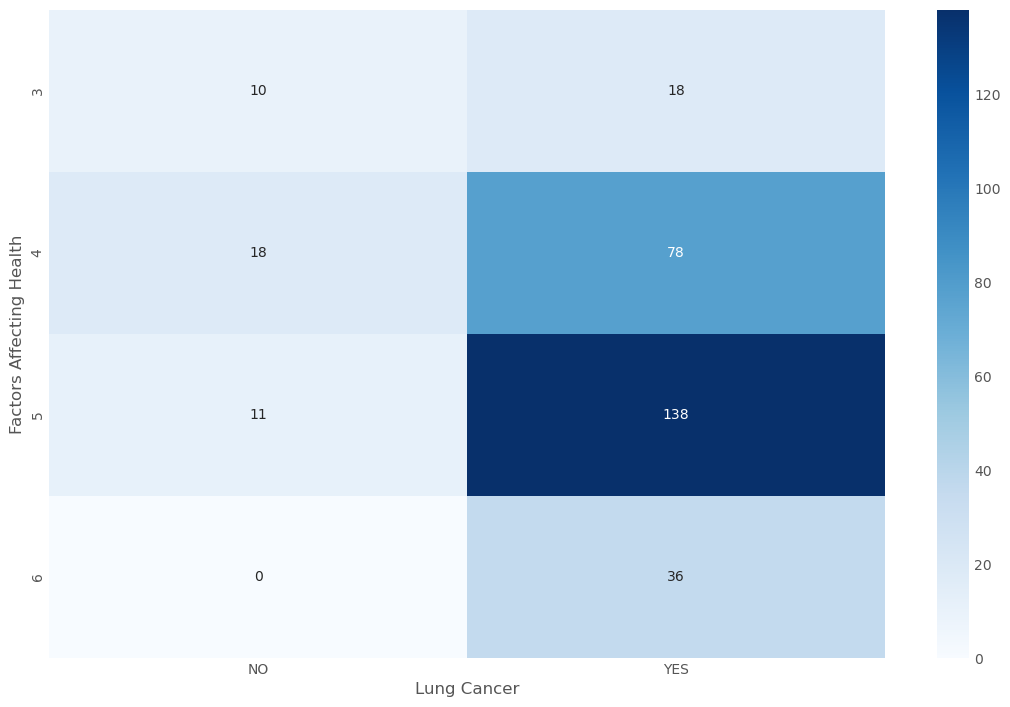

In [65]:
#Create new variable that encompasses the three variables that affect overall health of patient
df['FAH'] = df['ALCOHOL CONSUMING'] + df['CHRONIC DISEASE'] + df['SMOKING']

pd.crosstab(df['SMOKING'], df['LUNG_CANCER'])
contigency = pd.crosstab(df['FAH'], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="Blues",fmt = '.0f')
plt.ylabel('Factors Affecting Health')
plt.xlabel('Lung Cancer');


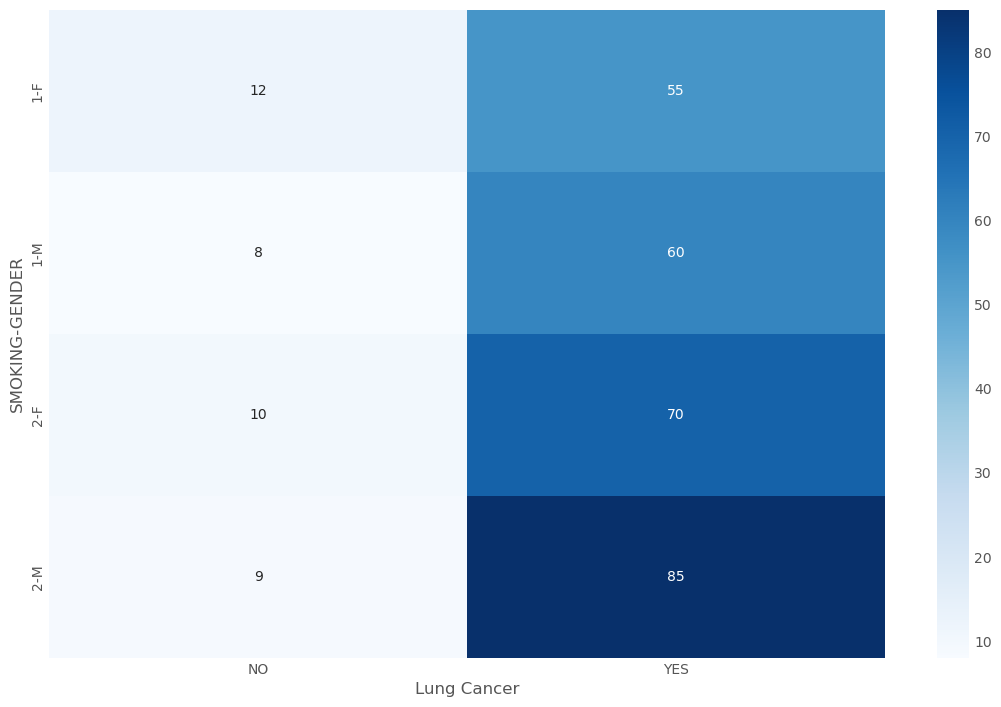

In [43]:
#Standard contigency table for now how to read them
STANDARD = pd.crosstab([df['SMOKING'],df['GENDER']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(STANDARD, annot=True, cmap="Blues",fmt = '.0f')
plt.xlabel('Lung Cancer');

##WILL NOT BE USED

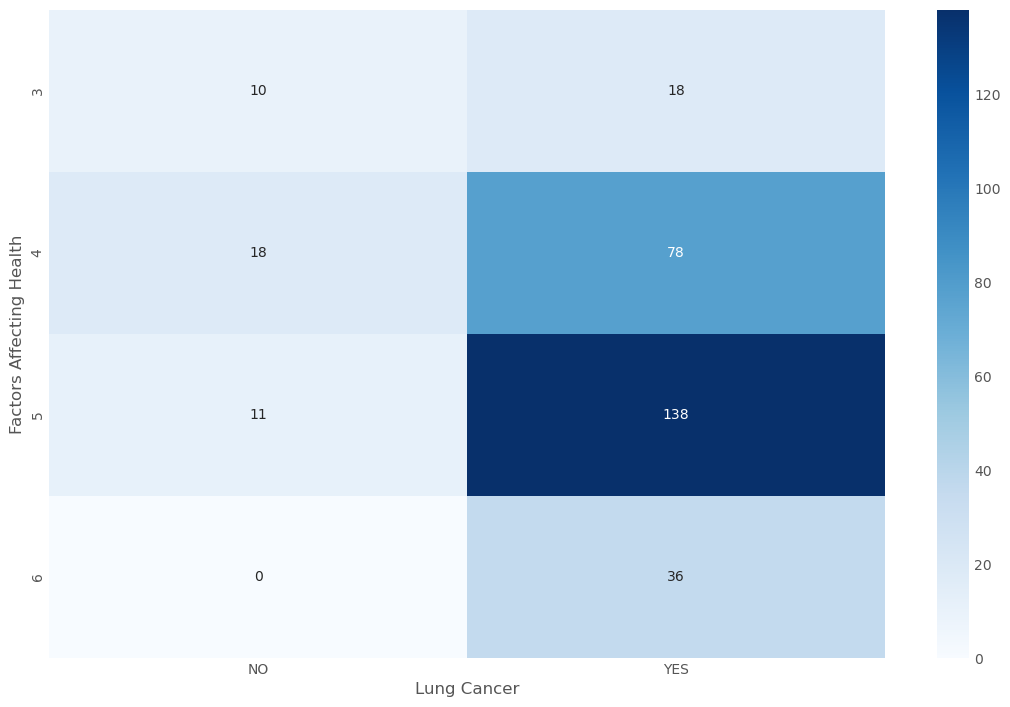

In [66]:
#Contigency table for newly added variable FAH
contigency = pd.crosstab([df['FAH']], df['LUNG_CANCER'])

#Heat map
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="Blues",fmt = '.0f')
plt.ylabel('Factors Affecting Health')
plt.xlabel('Lung Cancer');

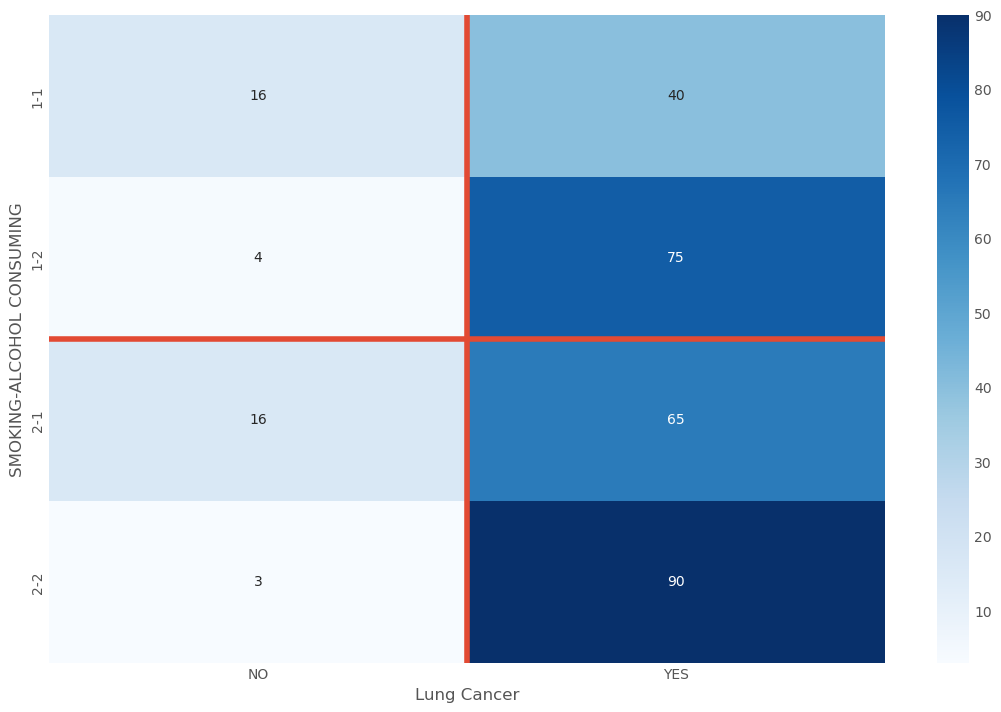

In [59]:
cont = pd.crosstab([df['SMOKING'],df['ALCOHOL CONSUMING']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(cont, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');

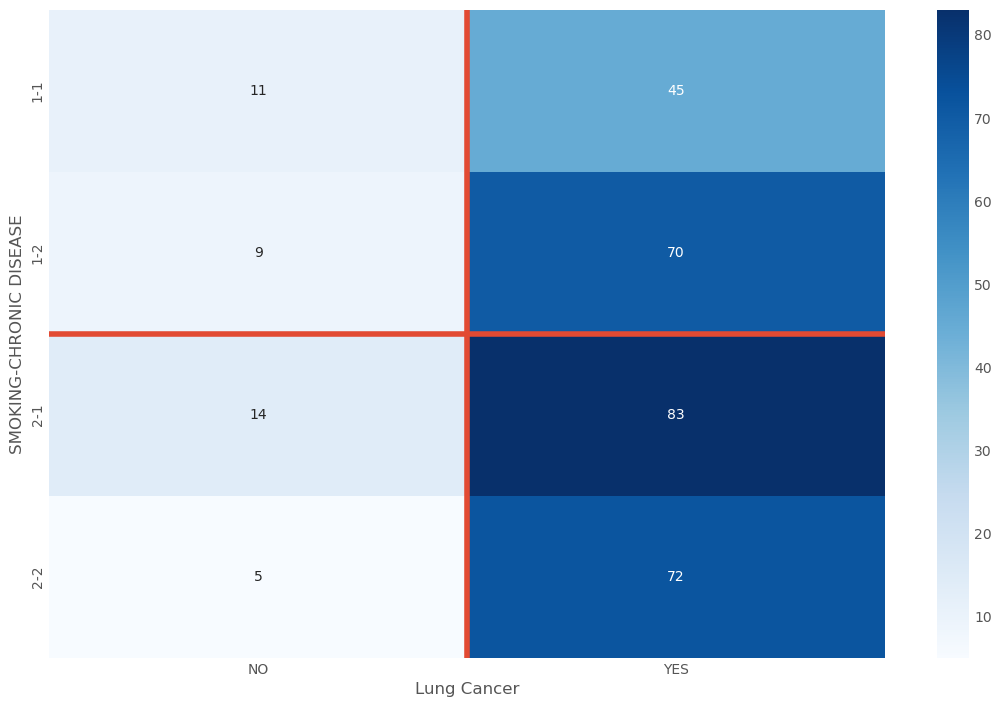

In [60]:
#Contigency table for smoking and chronic disease
SMOKE_CD = pd.crosstab([df['SMOKING'],df['CHRONIC DISEASE']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(SMOKE_CD, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');

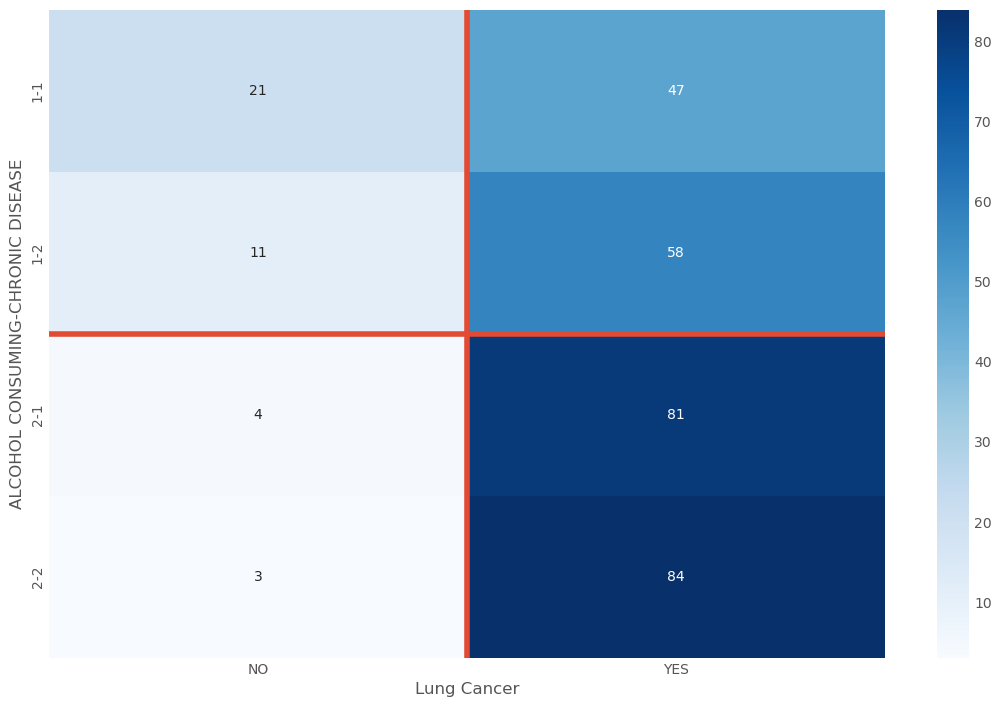

In [61]:
#Contigency table for alcohol and chronic disease
ALCOHOL_CD = pd.crosstab([df['ALCOHOL CONSUMING'],df['CHRONIC DISEASE']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(ALCOHOL_CD, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');


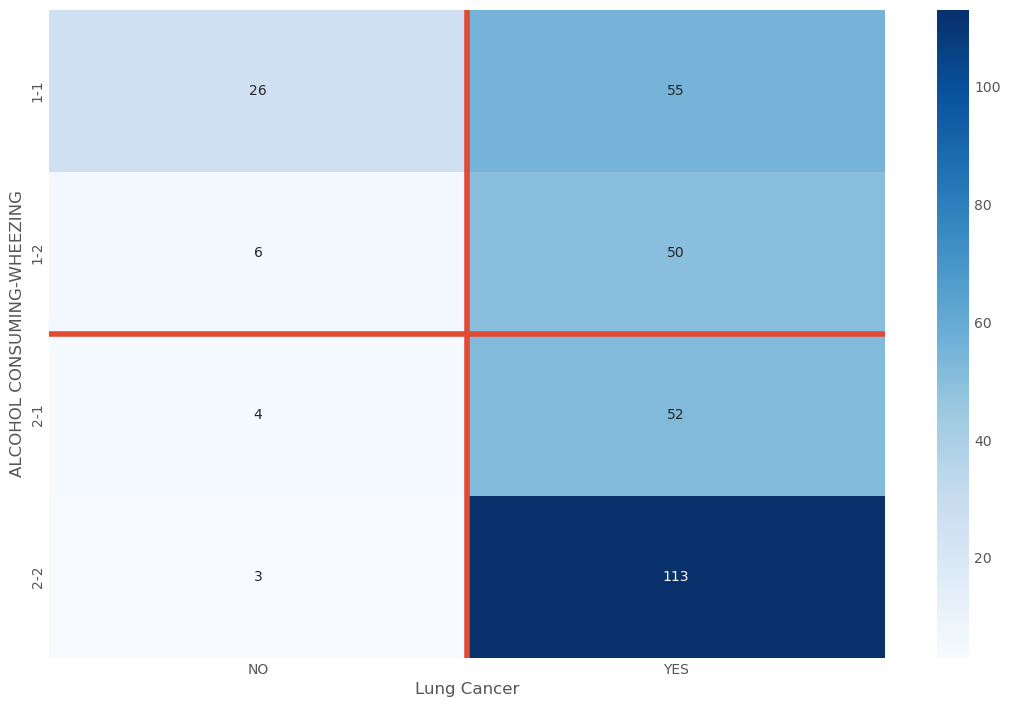

In [58]:
#Contigency table for alcohol and chronic disease
ALCOHOL_CD = pd.crosstab([df['ALCOHOL CONSUMING'],df['WHEEZING']], df['LUNG_CANCER'])
plt.figure(figsize=(12,8))
sns.heatmap(ALCOHOL_CD, annot=True, cmap="Blues",fmt = '.0f')
plt.axhline(y=2)
plt.axvline(x=1)
plt.xlabel('Lung Cancer');

In [15]:
#AGE does not change to much between just having lung cancer or not
df['AGE'].groupby(df['LUNG_CANCER']).agg('mean')

# 
df['AGE'].groupby([df['LUNG_CANCER'],df['SMOKING'],df['CHRONIC DISEASE']]).agg('mean')



LUNG_CANCER  SMOKING  CHRONIC DISEASE
NO           1        1                  59.272727
                      2                  64.555556
             2        1                  62.428571
                      2                  52.400000
YES          1        1                  63.888889
                      2                  63.700000
             2        1                  62.698795
                      2                  61.930556
Name: AGE, dtype: float64

In [ ]:
# Group by age



In [ ]:
# Look at symptoms (coughing, shortness of breath) by alcohol and smoking - Vice Penalty


